# 사전 지식

이 문제에서는 데이터를 보존하면서 차원을 축소하는 방법 중 하나인 PCA(Principal Component Analysis)에 대해 다룹니다. 이론적인 설명은 [여기](http://matrix.skku.ac.kr/math4ai-intro/W12/)를 참고하세요.

간단히 설명하면 데이터의 공분산 행렬은 네 개의 고윳값과 그에 상응하는 고유벡터를 가지며, 네 개의 고유벡터는 선형 독립입니다. 즉 네 개의 고유벡터를 통해 데이터를 표현하는 새로운 좌표계를 구성할 수 있습니다. 각각의 고윳값은 그 축에 저장되어 있는 데이터의 비율을 나타냅니다. 이 문제를 정상적으로 해결한다면, 네 개의 축을 두 개로 줄이면서, 전체 데이터의 95.8%를 보존할 수 있습니다.

데이터를 새로운 좌표계로 표현하기 위해서는 어떻게 해야 할지 생각해 보세요. 약간의 선형대수학 지식이 필요할 수 있습니다.

# 사용법

`np.cov`를 통해 공분산 행렬을 계산할 수 있습니다.

정사각행렬의 고윳값을 계산해 주는 `eig` 함수의 선언은 다음과 같습니다.

```
scipy.linalg.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)
```

여기서 `a`는 고윳값을 구하고자 하는 행렬, `left`와 `right`는 각각 왼쪽과 오른쪽 고유벡터를 반환할 것인지의 여부를 의미합니다. 지정되지 않았다면 오른쪽 고유벡터만이 반환됩니다.

중복도 $M$인 행렬에 대해 호출된 `eig` 함수는 길이 $M$의 고윳값 배열과, 형태 $M \times M$의 고윳값 행렬을 반환합니다.

`eigh` 함수와 `eigvals` 함수도 비슷한 동작을 수행하지만, 각각 대칭 행렬에 대해서 작동하거나 고유벡터를 반환하지 않는다는 차이점이 있습니다.

# 문제

다음과 같이 동작하는 함수 `iris_pca`를 작성하시오:

- 입력: 꽃받침의 길이, 꽃받침의 너비, 꽃잎의 길이, 꽃잎의 너비 데이터를 담고 있는 4 $\times$ 150 행렬 `data`, 꽃의 종류 데이터를 담고 있는 길이 150의 배열 `target` (0: Setosa, 1: Versicolor, 2: Virginica)

- 출력: PCA를 수행해 두 개의 축으로 줄인 Setosa 데이터 `pos0`, Versicolor 데이터 `pos1`, Virginica 데이터 `pos2` (모두 형태가 2 $\times$ 50인 ndarray)

In [ ]:
# 필요한 패키지들을 임포트하세요
import numpy as np
import matplotlib.pyplot as plt


# 여기에 코드를 작성하세요
def iris_pca(data, target):
    return [], [], []


########################################
# 그래프를 그리는 코드 - 수정하지 마세요
data = np.load("./iris_data.npy")
target = np.load("./iris_target.npy")

points = list(iris_pca(data, target))

color = ["r", "g", "b"]
label = ["Setosa", "Versicolor", "Virginica"]

for idx, pos in enumerate(points):
    plt.scatter(*pos, color=color[idx], label=label[idx])

plt.legend()
plt.plot()

# 모범 답안

보존된 데이터의 비율: 0.9581320720000165


[]

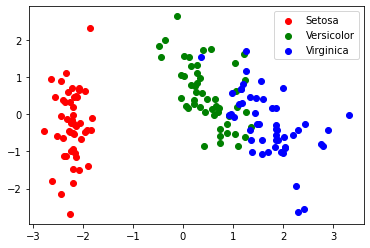

In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt


def iris_pca(data, target):
    cov_mat = np.cov(data)

    eigval, eigvec = eig(cov_mat)

    pc = eigvec.T[0:2] @ data

    points = list()
    for species in range(3):
        selector = target == species
        points.append(pc[:, selector])

    ratio = ((eigval[0] + eigval[1]) / np.sum(eigval)).real
    print("보존된 데이터의 비율:", ratio)

    return points[0], points[1], points[2]


data = np.load("./iris_data.npy")
target = np.load("./iris_target.npy")

points = list(iris_pca(data, target))

color = ["r", "g", "b"]
label = ["Setosa", "Versicolor", "Virginica"]

for idx, pos in enumerate(points):
    plt.scatter(*pos, color=color[idx], label=label[idx])

plt.legend()
plt.plot()

# 부록

아래의 코드는 문제에서 제공되는 데이터셋을 생성하는 코드입니다. 데이터 파일이 손상된 경우에 사용하세요.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

raw = load_iris()
data = StandardScaler().fit_transform(raw.data).T
target = raw.target

np.save("./iris_data", data)
np.save("./iris_target", target)